In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
ds = pd.read_csv('iris_cleaned.csv', index_col=0)

In [3]:
x = ds.iloc[:,0:4].values
y = ds['class'].values

In [4]:
x_train, x_test, y_train, _y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [5]:
clf = DecisionTreeClassifier()

In [6]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
gbdt = GradientBoostingClassifier(n_estimators=10)

In [8]:
gbdt.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [9]:
import pydotplus
from IPython.display import Image
from sklearn import tree

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=ds.columns[0:4],
                               class_names=ds['class'].unique(),
                               filled=True, rounded=True,
                               special_characters=True)

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data)

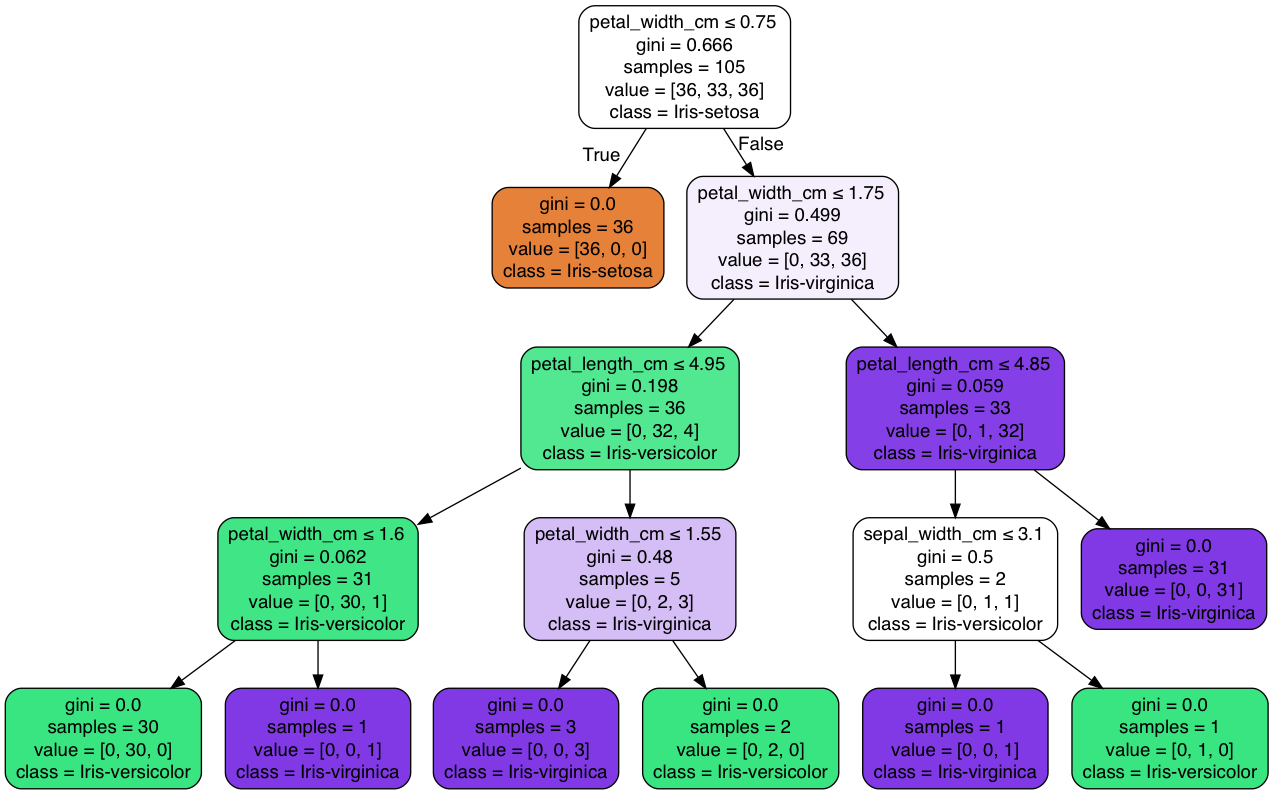

In [12]:
Image(graph.create_png())

In [13]:
enc = OneHotEncoder()

In [14]:
clf.apply(x_train)

array([ 1,  5, 13, 14, 14,  5, 14,  5,  5,  5,  1,  1,  5,  1, 14,  1,  1,
        6,  5, 14,  1, 14,  1,  5,  9,  1, 14, 14, 14, 14,  8,  1,  5, 14,
        5,  1, 14,  5,  5,  1,  1,  1,  5, 14, 14,  5,  1,  1,  1, 14, 14,
        5,  5, 14, 14, 14,  8,  5,  1,  1,  5,  1,  1, 14,  5,  1,  1,  1,
        5,  1,  5,  1,  5,  8,  1,  5,  5, 14,  1, 12,  1,  5,  9, 14, 14,
        1,  5, 14, 14,  5,  5, 14,  1, 14,  1,  1,  5,  1, 14, 14, 14,  5,
        1, 14,  1])

In [73]:
x_train_leaves = gbdt.apply(x_train)[:,:,0]

In [74]:
x_test_leaves = gbdt.apply(x_test)[:,:,0]

In [75]:
(train_rows, col) = x_train_leaves.shape

In [78]:
x_leaves = np.concatenate((x_train_leaves, x_test_leaves), axis=0)

In [90]:
x_trans = enc.fit_transform(x_leaves)

In [94]:
lr = LogisticRegression()

In [103]:
lr.fit(x_trans[:train_rows, :], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
y_pred = lr.predict(x_trans[train_rows:, :])

In [120]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

In [118]:
precision_score(_y_test, y_pred, average='micro')

0.9555555555555556

In [117]:
recall_score(_y_test, y_pred, average='micro')

0.9555555555555556

In [121]:
confusion_matrix(_y_test, y_pred)

array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 14]])

## 将编码后的数据作为新特征与原来的特征组合

In [149]:
x_train_stack = np.concatenate((x_trans[:train_rows,:].toarray(), x_train), axis=1)

In [151]:
x_test_stack = np.concatenate((x_trans[train_rows:,:].toarray(), x_test), axis=1)

In [152]:
lr_stack = LogisticRegression()

In [153]:
lr_stack.fit(x_train_stack, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
y_stack_pred = lr_stack.predict(x_test_stack)

In [156]:
confusion_matrix(_y_test, y_stack_pred)

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 14]])